# Linear Regression Model - from scratch

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

## Linear Regression ( Using Functions )

In [126]:
def generate_data(rows=50,features=2): 
    A = np.random.randint(1,100,size=(rows,features))
    B = np.dot(A,np.random.randint(1,5,(A.shape[1],1)))
    return np.array([np.random.rand()+a for a in A]) if features>1 else np.array([(np.random.randint(1,15))+a for a in A]),B

In [127]:
def cost_fxn(y,h):
    return ((y-h)**2).mean()/2

In [128]:
def gradient_descent(x,y,lr=0.0001,num_iters=1000):
    
    # Add Intercept
    intercept = np.ones((x.shape[0], 1))
    x = np.concatenate((intercept, x), axis=1)
    
    w = np.zeros((x.shape[1],1))
    m = y.shape[0]
        
    for i in range(num_iters):
        h = np.dot(x,w)
        w = w -(lr/m)*sum(x * (h-y)).reshape(-1,1)
        
        if i%100==0:
            print('Cost at',i,'iteration :',cost_fxn(y,h))      

    return w

In [129]:
def sklearn_linear_regression(x1,y1):
    mod = LinearRegression()
    mod.fit(x1,y1)
    p = mod.predict(x1)
    print('Rsq:',r2_score(p,y1).round(4),'RMSE:',np.sqrt(mean_squared_error(p,y1)).round(3))

### 1. Simple Linear Regression

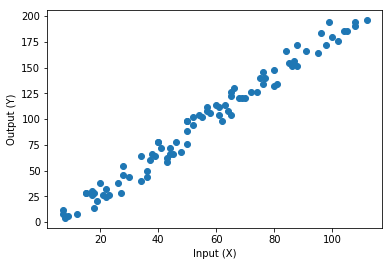

X:  (90, 1) Y:  (90, 1)


In [130]:
# Initialize the Data
X,Y = generate_data(rows=90,features=1)

plt.scatter(X[:,0],Y)
plt.xlabel('Input (X)')
plt.ylabel('Output (Y)')
plt.show()

print('X: ',X.shape,'Y: ',Y.shape)

In [131]:
W = gradient_descent(X,Y)
print('Weights\n',W)

Cost at 0 iteration : 6054.844444444445
Cost at 100 iteration : 42.35196741741643
Cost at 200 iteration : 42.31444495620079
Cost at 300 iteration : 42.277079402470115
Cost at 400 iteration : 42.239870100085135
Cost at 500 iteration : 42.20281639565042
Cost at 600 iteration : 42.165917638502805
Cost at 700 iteration : 42.129173180700015
Cost at 800 iteration : 42.09258237700925
Cost at 900 iteration : 42.05614458489593
Weights
 [[-0.16678462]
 [ 1.77571767]]


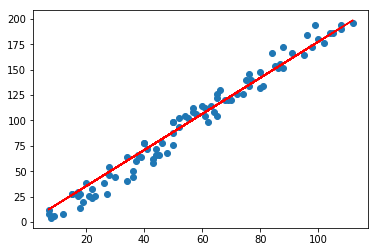

In [132]:
# Making predictions
# Add Intercept
intercept = np.ones((X.shape[0], 1))
X1 = np.concatenate((intercept, X), axis=1)
pred = np.dot(X1,W)

plt.scatter(X[:,0].reshape(-1,1), Y) 
plt.plot(X[:,0].reshape(-1,1),pred,color='red')
plt.show()

In [133]:
print('Rsq:',r2_score(pred,Y).round(4),'RMSE:',np.sqrt(mean_squared_error(pred,Y)).round(3))

Rsq: 0.9667 RMSE: 9.167


In [134]:
# Check Sk-learn module results
sklearn_linear_regression(X,Y)

Rsq: 0.9771 RMSE: 8.171


### 2. Multiple Linear Regression

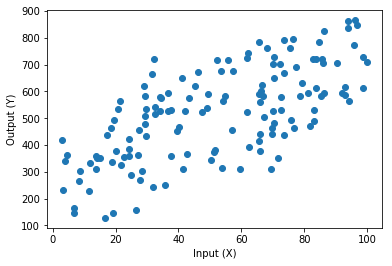

X:  (140, 3) Y:  (140, 1)


In [135]:
# Initialize the Data
X,Y = generate_data(rows=140,features=3)

feature_no = 3# Change this value to check other features plots
plt.scatter(X[:,feature_no-1],Y)
plt.xlabel('Input (X)')
plt.ylabel('Output (Y)')
plt.show()

print('X: ',X.shape,'Y: ',Y.shape)

In [136]:
W = gradient_descent(X,Y)
print('Weights\n',W)

Cost at 0 iteration : 149166.6857142857
Cost at 100 iteration : 5.017603364202334
Cost at 200 iteration : 5.015206259837102
Cost at 300 iteration : 5.013022342537142
Cost at 400 iteration : 5.010842437955597
Cost at 500 iteration : 5.008666538599469
Cost at 600 iteration : 5.006494637109802
Cost at 700 iteration : 5.004326726141221
Cost at 800 iteration : 5.0021627983616925
Cost at 900 iteration : 5.000002846452776
Weights
 [[0.01164761]
 [3.98028679]
 [1.97805963]
 [3.9531193 ]]


In [137]:
# Making predictions
intercept = np.ones((X.shape[0], 1))
X1 = np.concatenate((intercept, X), axis=1)
pred = np.dot(X1,W)

In [138]:
print('Rsq:',r2_score(pred,Y).round(4),'RMSE:',np.sqrt(mean_squared_error(pred,Y)).round(3))

Rsq: 0.9997 RMSE: 3.162


In [139]:
# Check Sk-learn module results
sklearn_linear_regression(X,Y)

Rsq: 0.9997 RMSE: 2.766


## Linear Regression ( Using Classes)

In [140]:
class LinearRegression_1:
    
    def __init__(self,learning_rate=0.0001,num_iters=1000,verbose=False):
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.verbose = verbose
        self.cost_history = []
        
    def _add_intercept(self,x):
        intercept = np.ones((x.shape[0],1))
        return np.concatenate((intercept,x),axis=1)

    def cost(self,y,h):
        return ((y-h)**2).mean()/2
    
    def fit(self,x,y):
        # Add Intercept term
        x = self._add_intercept(x)
        
        # Weights Initialization
        self.theta = np.zeros((x.shape[1],1))
        
        for i in range(self.num_iters):
            h = np.dot(x,self.theta)
            self.theta -=(self.learning_rate/y.shape[0])*sum(x * (h-y)).reshape(-1,1)
            
            if self.verbose and i%100==0:
                cost = self.cost(y,np.dot(x,self.theta))
                self.cost_history.append([i,cost])
                #print('Cost at',i,'iteration :',cost)
    
    def predict(self,x):
        return np.dot(self._add_intercept(x),self.theta)
    
    def score(self,x,y):
        p = self.predict(x)
        return pd.DataFrame({'R-sq':r2_score(y,p),'RMSE':np.sqrt(2*self.cost(y,p))},index=['Score']).T
    
    
    def plot_cost_iterations(self):
        num_iters,cost = list(zip(*self.cost_history))
        sns.scatterplot(num_iters,cost)
        plt.title('Num-Iterations vs Cost')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')
        plt.show()
        
        

### 1. Simple Linear Regression

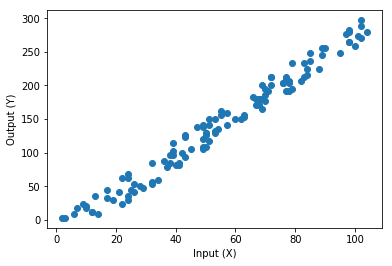

X:  (120, 1) Y:  (120, 1)


In [141]:
# Initialize the Data
X,Y = generate_data(rows=120,features=1)

plt.scatter(X[:,0],Y)
plt.xlabel('Input (X)')
plt.ylabel('Output (Y)')
plt.show()

print('X: ',X.shape,'Y: ',Y.shape)

In [142]:
model = LinearRegression_1(verbose=True,num_iters=1000)
model.fit(X,Y)
p = model.predict(X)
p.shape

(120, 1)

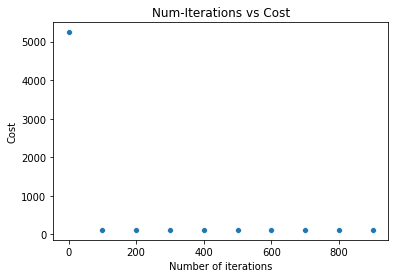

In [143]:
model.plot_cost_iterations()

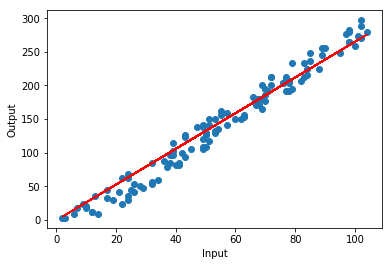

In [144]:
plt.scatter(X, Y) 
plt.plot(X,p,color='red')
plt.xlabel('Input')
plt.ylabel('Output')
#plt.title("Simple Linear Regression")
plt.show()

In [145]:
model.score(X,Y)

,Score
R-sq,0.965222
RMSE,14.928244


In [146]:
# Check Sklearn module results
sklearn_linear_regression(X,Y)

Rsq: 0.9751 RMSE: 12.483


### 2. Multiple Linear Regression

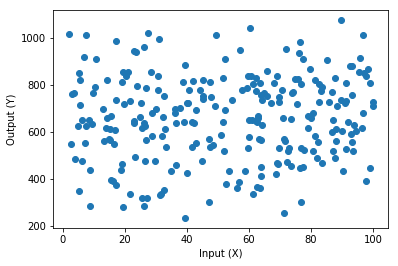

X:  (250, 5) Y:  (250, 1)


In [147]:
# Initialize the Data
X,Y = generate_data(rows=250,features=5)

plt.scatter(X[:,0],Y)
plt.xlabel('Input (X)')
plt.ylabel('Output (Y)')
plt.show()

print('X: ',X.shape,'Y: ',Y.shape)

In [148]:
model = LinearRegression_1(verbose=True,num_iters=1000)
model.fit(X,Y)
p = model.predict(X)
p.shape

(250, 1)

In [149]:
model.score(X,Y)

,Score
R-sq,0.999516
RMSE,3.944921


In [150]:
# Check Sklearn module results
sklearn_linear_regression(X,Y)

Rsq: 0.9996 RMSE: 3.756


## NOTES

This is simple demonstration of linear regression from scratch.<br>


We achieved good results, because the data is generated in such a way (i.e., output is directly linear combination of input variables (approx) )<br>

But in reality we get various kinds of input data, and those may contain many problems such as multicollinearity and many more..etc. 

